In [6]:
#import dependencies
from citipy import citipy
import pandas as pd
import random
from config import api_key
import requests
import json
import matplotlib.pyplot as plt

In [2]:
#setup lists to hold our random long and lats
random_long = []
random_lat = []

#count to 500, generate a random list of longitudes and latitudes
i = 1
while i <= 500:
    random_long.append(random.randint(-180, 80))
    random_lat.append(random.randint(-90, 90))
    #per https://knowledge.domo.com/Visualize/Adding_Cards_to_Domo/KPI_Cards/Building_Each_Chart_Type/Latitude-Longitude_Map
    #longitude ranges from -180 to 80 and latitude ranges from -90 to 90
    i = i + 1

In [3]:
#apply our random long and lat to citypy to get a list of cities, 0 to 499

list_of_cities = []

#run through our random lat and longs, find the closest city via citipy
j = 0
while j <= 499:
    city = citipy.nearest_city(random_lat[j],random_long[j])
    list_of_cities.append(str(city.city_name))
    j = j + 1

In [ ]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&units=imperial&q="

list_of_long = []
list_of_lat = []
list_of_temp = []
list_of_humid = []
list_of_cloudy = []
list_of_wind = []

k = 0
while k <= 499:
    response = requests.get(query_url + list_of_cities[k]).json()
    try:
        list_of_long.append(response['coord']['lon'])
        list_of_lat.append(response['coord']['lat'])
        list_of_temp.append(response['main']['temp'])
        list_of_humid.append(response['main']['humidity'])
        list_of_cloudy.append(response['clouds']['all'])
        list_of_wind.append(response['wind']['speed'])
        k = k + 1
    except KeyError:
        city_to_delete = list_of_cities[k]
        list_of_cities.remove(city_to_delete)
        new_long = random.randint(-180, 80)
        new_lat = random.randint(-90, 90)
        new_city = citipy.nearest_city(new_lat,new_long)
        list_of_cities.append(str(new_city.city_name))

Text(0.5, 1.0, 'Wind Speed vs. Latitude')

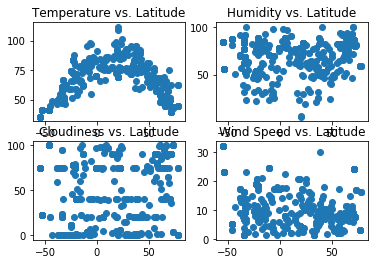

In [14]:
#print(len(list_of_long))

#create a blank dataframe with columns
cities_df = pd.DataFrame()
cities_df["City"] = list_of_cities
cities_df["Longitude"] = list_of_long
cities_df["Latitude"] = list_of_lat
cities_df["Temperature (F)"] = list_of_temp
cities_df["Humidity (%)"] = list_of_humid
cities_df["Cloudiness (%)"] = list_of_cloudy
cities_df["Wind Speed (mph)"] = list_of_wind

#cities_df

fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(list_of_lat, list_of_temp)
axs[0, 0].set_title('Temperature vs. Latitude')
axs[0, 1].scatter(list_of_lat, list_of_humid)
axs[0, 1].set_title('Humidity vs. Latitude')
axs[1, 0].scatter(list_of_lat, list_of_cloudy)
axs[1, 0].set_title('Cloudiness vs. Latitude')
axs[1, 1].scatter(list_of_lat, list_of_wind)
axs[1, 1].set_title('Wind Speed vs. Latitude')

#for ax in axs.flat:
#    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()